In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk
nltk.download('punkt')
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mrinal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\Mrinal\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_json('C:/Users/Mrinal/Desktop/Whats cooking/train.json/train.json')
test = pd.read_json('C:/Users/Mrinal/Desktop/Whats cooking/test.json/test.json')


In [3]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
#missing values
(train.isnull().sum() / len(train)) * 100

cuisine        0.0
id             0.0
ingredients    0.0
dtype: float64

In [5]:
(test.isnull().sum() / len(test)) * 100

id             0.0
ingredients    0.0
dtype: float64

In [6]:
train['seperated_ingredients'] = train['ingredients'].apply(','.join)
test['seperated_ingredients'] = test['ingredients'].apply(','.join)

train['ingredients'].str.len().max(),train['ingredients'].str.len().min()

(65, 1)

Text(0.5,1,'Histogram of Number of ingredients per dish')

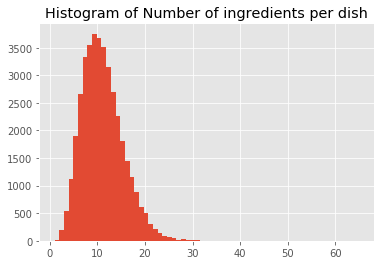

In [7]:
plt.hist(train['ingredients'].str.len(), bins=train['ingredients'].str.len().max())
plt.title('Histogram of Number of ingredients per dish')

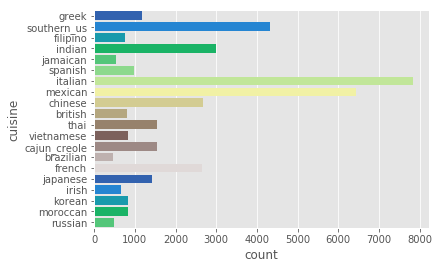

In [8]:
sns.countplot(y='cuisine', data=train,palette=sns.color_palette('terrain',15))

In [9]:
def a(t):
    top = Counter([i for list in t.ingredients for i in list]).most_common(10)
    temp= pd.DataFrame(top)
    temp.columns = ['ingredient','total_count']
    a=sns.barplot(y=temp.ingredient, x=temp.total_count, palette=sns.color_palette('terrain',15)).set_title('Top 10 Ingredients in {} cuisine'.format(list(np.unique(t.cuisine))[0]))
    plt.show()
    

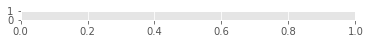

In [10]:
plt.subplot(20,1,20)

In [11]:
aa=list(np.unique(train['cuisine'].values))

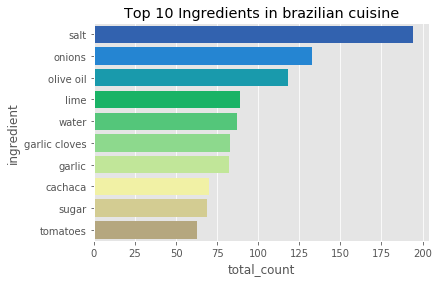

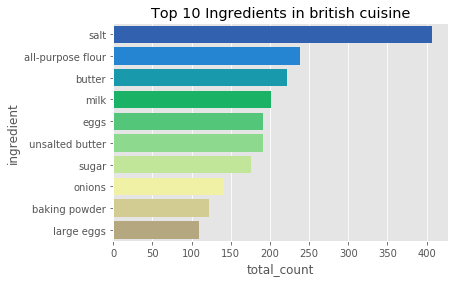

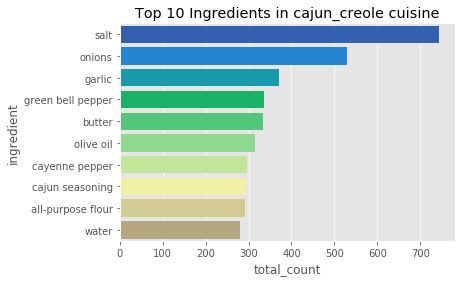

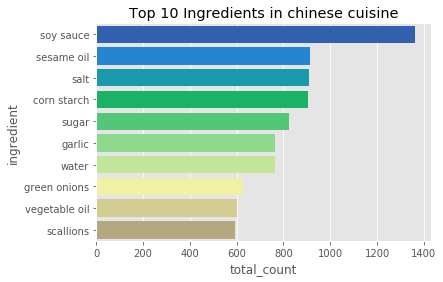

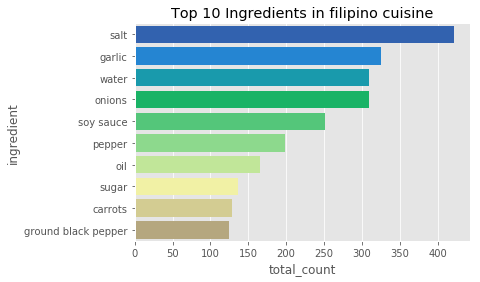

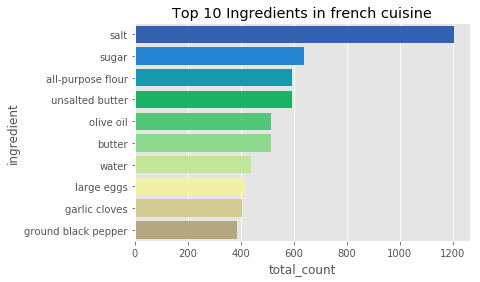

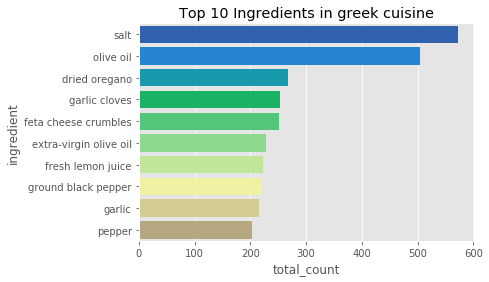

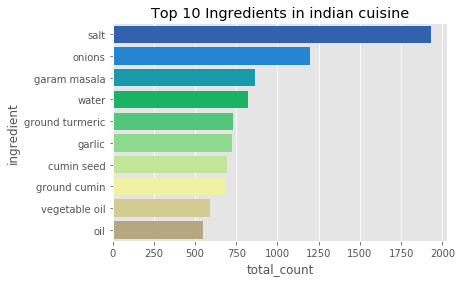

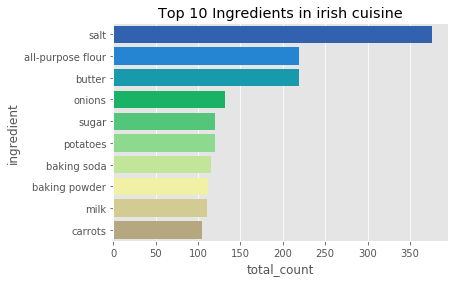

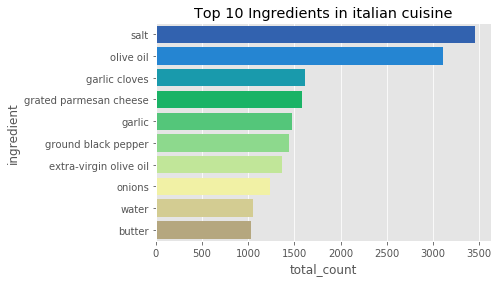

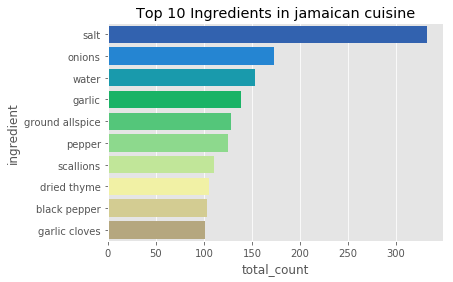

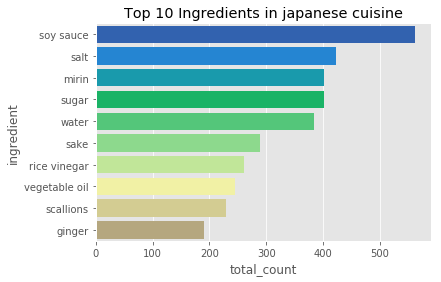

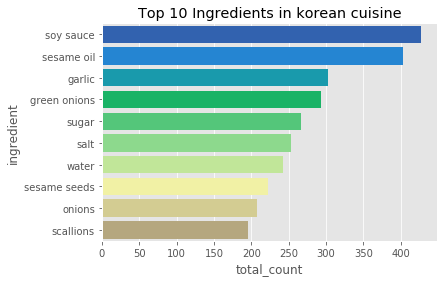

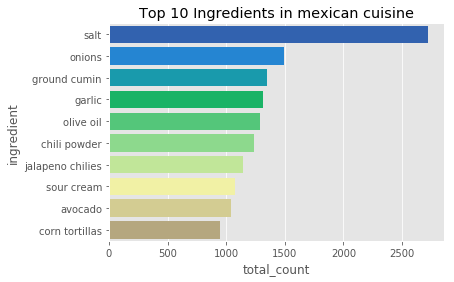

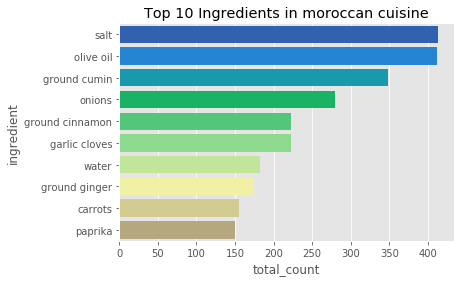

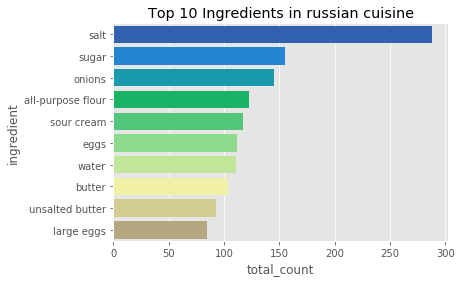

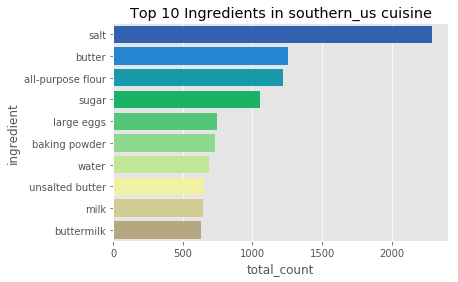

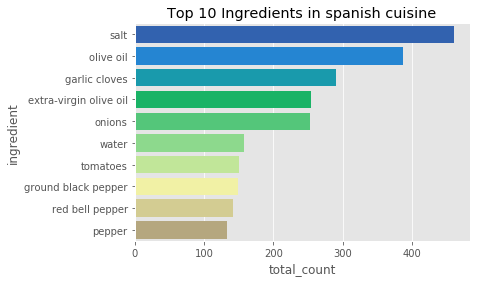

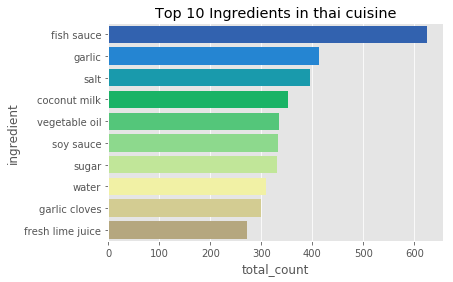

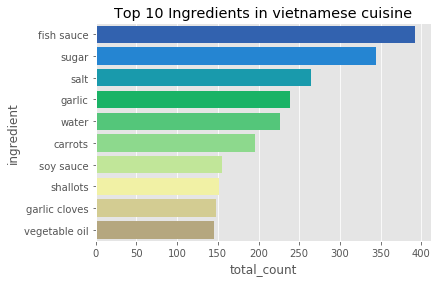

In [12]:
for i in aa:
        a(train[train['cuisine']==i])

In [13]:
train.head()

,cuisine,id,ingredients,seperated_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c..."
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper..."


In [14]:
# calculating if ingredient is or isnt used in a certain cuisne

train_df=train
ingredient_list = []
for index, row in train_df.iterrows():
    ingredients = row['ingredients']
    
    for i in ingredients:
        if i not in ingredient_list:
            ingredient_list.append(i)

def binary(ingredient_list2):
    binary_list = []
    
    for j in ingredient_list:
        if j in ingredient_list2:
            binary_list.append(1)
        else:
            binary_list.append(0)
    
    return binary_list
train_df['bin ingredients']=train_df['ingredients'].apply(lambda x: binary(x))

In [15]:
train_df.head()

,cuisine,id,ingredients,seperated_ingredients,bin ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."


In [16]:
df1 = (train.groupby('cuisine')['seperated_ingredients']
       .apply(lambda x: ','.join(set(x.dropna())))
       .reset_index())

In [17]:
df1.seperated_ingredients=list(df1.seperated_ingredients)

In [18]:
df1.head()

,cuisine,seperated_ingredients
0,brazilian,"fine salt,sweetened condensed milk,granulated ..."
1,british,"turnips,russet potatoes,bay leaf,parsnips,beef..."
2,cajun_creole,"jasmine rice,vegetable oil,salt,oregano,jack c..."
3,chinese,"dark soy sauce,water,salt,oyster sauce,pork,sh..."
4,filipino,"pork tenderloin,liver,frozen peas,water,garlic..."


In [19]:
df1['seperated_ingredients_list']=0
for i in range(0,df1.shape[0]):
    df1['seperated_ingredients_list'][i] = df1['seperated_ingredients'][i].split (',')


In [20]:
df1.head()

,cuisine,seperated_ingredients,seperated_ingredients_list
0,brazilian,"fine salt,sweetened condensed milk,granulated ...","[fine salt, sweetened condensed milk, granulat..."
1,british,"turnips,russet potatoes,bay leaf,parsnips,beef...","[turnips, russet potatoes, bay leaf, parsnips,..."
2,cajun_creole,"jasmine rice,vegetable oil,salt,oregano,jack c...","[jasmine rice, vegetable oil, salt, oregano, j..."
3,chinese,"dark soy sauce,water,salt,oyster sauce,pork,sh...","[dark soy sauce, water, salt, oyster sauce, po..."
4,filipino,"pork tenderloin,liver,frozen peas,water,garlic...","[pork tenderloin, liver, frozen peas, water, g..."


In [21]:
df1['ingredient_present']=df1['seperated_ingredients_list'].apply(lambda x: binary(x))

In [22]:
df1.head()

,cuisine,seperated_ingredients,seperated_ingredients_list,ingredient_present
0,brazilian,"fine salt,sweetened condensed milk,granulated ...","[fine salt, sweetened condensed milk, granulat...","[0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, ..."
1,british,"turnips,russet potatoes,bay leaf,parsnips,beef...","[turnips, russet potatoes, bay leaf, parsnips,...","[0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, ..."
2,cajun_creole,"jasmine rice,vegetable oil,salt,oregano,jack c...","[jasmine rice, vegetable oil, salt, oregano, j...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,chinese,"dark soy sauce,water,salt,oyster sauce,pork,sh...","[dark soy sauce, water, salt, oyster sauce, po...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,filipino,"pork tenderloin,liver,frozen peas,water,garlic...","[pork tenderloin, liver, frozen peas, water, g...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, ..."


In [23]:
# closeness of cuisines

from scipy import spatial

def Similarity(eins, zwei):
    loc1 = df1.iloc[eins]
    loc2 = df1.iloc[zwei]
    
    list1 = a['seperated_ingredients_list']
    list2 = b['seperated_ingredients_list']
    distance=spatial.distance.cosine(list1,list2)
    
    return distance, zwei

In [24]:
from scipy import spatial
spatial.distance.cosine(df1.iloc[3]['ingredient_present'],df1.iloc[6]['ingredient_present'])

0.5731661710528551

In [25]:
dd=pd.DataFrame()

In [27]:
for i in range(0,20):
    for j in range(0,20):
        dd.loc[i,j]=spatial.distance.cosine(df1.iloc[i]['ingredient_present'],df1.iloc[j]['ingredient_present'])
        

In [28]:
dd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.566883,0.544525,0.575981,0.538454,0.564948,0.570643,0.551999,0.563095,0.587551,0.491539,0.574587,0.596878,0.559990,0.541232,0.566250,0.556416,0.508150,0.551323,0.575917
1,0.566883,0.000000,0.568045,0.591326,0.617214,0.480386,0.558547,0.554030,0.458777,0.539882,0.561719,0.602605,0.653707,0.575329,0.547989,0.490441,0.515721,0.528600,0.632588,0.651861
2,0.544525,0.568045,0.000000,0.541427,0.564048,0.474960,0.493781,0.535755,0.543233,0.449151,0.508697,0.564965,0.616466,0.454521,0.541677,0.542943,0.420475,0.464812,0.542165,0.586092
3,0.575981,0.591326,0.541427,0.000000,0.497681,0.546836,0.573166,0.491826,0.607539,0.544005,0.550344,0.436918,0.471792,0.515837,0.545753,0.592927,0.526233,0.563468,0.395141,0.420793
4,0.538454,0.617214,0.564048,0.497681,0.000000,0.602413,0.607254,0.545640,0.627306,0.617292,0.518109,0.514213,0.521336,0.583922,0.587201,0.593498,0.579292,0.575092,0.494542,0.479539
5,0.564948,0.480386,0.474960,0.546836,0.602413,0.000000,0.467712,0.521615,0.489306,0.379363,0.568496,0.561409,0.621770,0.475788,0.498471,0.509922,0.432152,0.424670,0.562035,0.596724
6,0.570643,0.558547,0.493781,0.573166,0.607254,0.467712,0.000000,0.492764,0.547351,0.468997,0.553781,0.584026,0.612035,0.507555,0.426549,0.523540,0.512253,0.456887,0.552041,0.601637
7,0.551999,0.554030,0.535755,0.491826,0.545640,0.521615,0.492764,0.000000,0.560463,0.519970,0.503929,0.477155,0.585207,0.500448,0.450334,0.550519,0.503885,0.512104,0.443943,0.521402
8,0.563095,0.458777,0.543233,0.607539,0.627306,0.489306,0.547351,0.560463,0.000000,0.547131,0.553875,0.613691,0.654043,0.562816,0.539600,0.500468,0.508898,0.524161,0.628329,0.662563
9,0.587551,0.539882,0.449151,0.544005,0.617292,0.379363,0.468997,0.519970,0.547131,0.000000,0.586101,0.574286,0.637597,0.417989,0.532036,0.565224,0.420508,0.458056,0.561983,0.608066


In [29]:
dict={0:'brazilian', 1:'british', 2:'cajun_creole', 3:'chinese', 4:'filipino', 5:'french', 6:'greek', 7:'indian', 8:'irish', 
      9:'italian', 10:'jamaican', 11:'japanese', 12:'korean', 13:'mexican', 14:'moroccan', 15:'russian', 16:'southern_us', 
      17:'spanish', 18:'thai', 19:'vietnamese'}
dist_cosine=dd.rename(index = dict, columns=dict)

In [30]:
dist_cosine

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
brazilian,0.000000,0.566883,0.544525,0.575981,0.538454,0.564948,0.570643,0.551999,0.563095,0.587551,0.491539,0.574587,0.596878,0.559990,0.541232,0.566250,0.556416,0.508150,0.551323,0.575917
british,0.566883,0.000000,0.568045,0.591326,0.617214,0.480386,0.558547,0.554030,0.458777,0.539882,0.561719,0.602605,0.653707,0.575329,0.547989,0.490441,0.515721,0.528600,0.632588,0.651861
cajun_creole,0.544525,0.568045,0.000000,0.541427,0.564048,0.474960,0.493781,0.535755,0.543233,0.449151,0.508697,0.564965,0.616466,0.454521,0.541677,0.542943,0.420475,0.464812,0.542165,0.586092
chinese,0.575981,0.591326,0.541427,0.000000,0.497681,0.546836,0.573166,0.491826,0.607539,0.544005,0.550344,0.436918,0.471792,0.515837,0.545753,0.592927,0.526233,0.563468,0.395141,0.420793
filipino,0.538454,0.617214,0.564048,0.497681,0.000000,0.602413,0.607254,0.545640,0.627306,0.617292,0.518109,0.514213,0.521336,0.583922,0.587201,0.593498,0.579292,0.575092,0.494542,0.479539
french,0.564948,0.480386,0.474960,0.546836,0.602413,0.000000,0.467712,0.521615,0.489306,0.379363,0.568496,0.561409,0.621770,0.475788,0.498471,0.509922,0.432152,0.424670,0.562035,0.596724
greek,0.570643,0.558547,0.493781,0.573166,0.607254,0.467712,0.000000,0.492764,0.547351,0.468997,0.553781,0.584026,0.612035,0.507555,0.426549,0.523540,0.512253,0.456887,0.552041,0.601637
indian,0.551999,0.554030,0.535755,0.491826,0.545640,0.521615,0.492764,0.000000,0.560463,0.519970,0.503929,0.477155,0.585207,0.500448,0.450334,0.550519,0.503885,0.512104,0.443943,0.521402
irish,0.563095,0.458777,0.543233,0.607539,0.627306,0.489306,0.547351,0.560463,0.000000,0.547131,0.553875,0.613691,0.654043,0.562816,0.539600,0.500468,0.508898,0.524161,0.628329,0.662563
italian,0.587551,0.539882,0.449151,0.544005,0.617292,0.379363,0.468997,0.519970,0.547131,0.000000,0.586101,0.574286,0.637597,0.417989,0.532036,0.565224,0.420508,0.458056,0.561983,0.608066


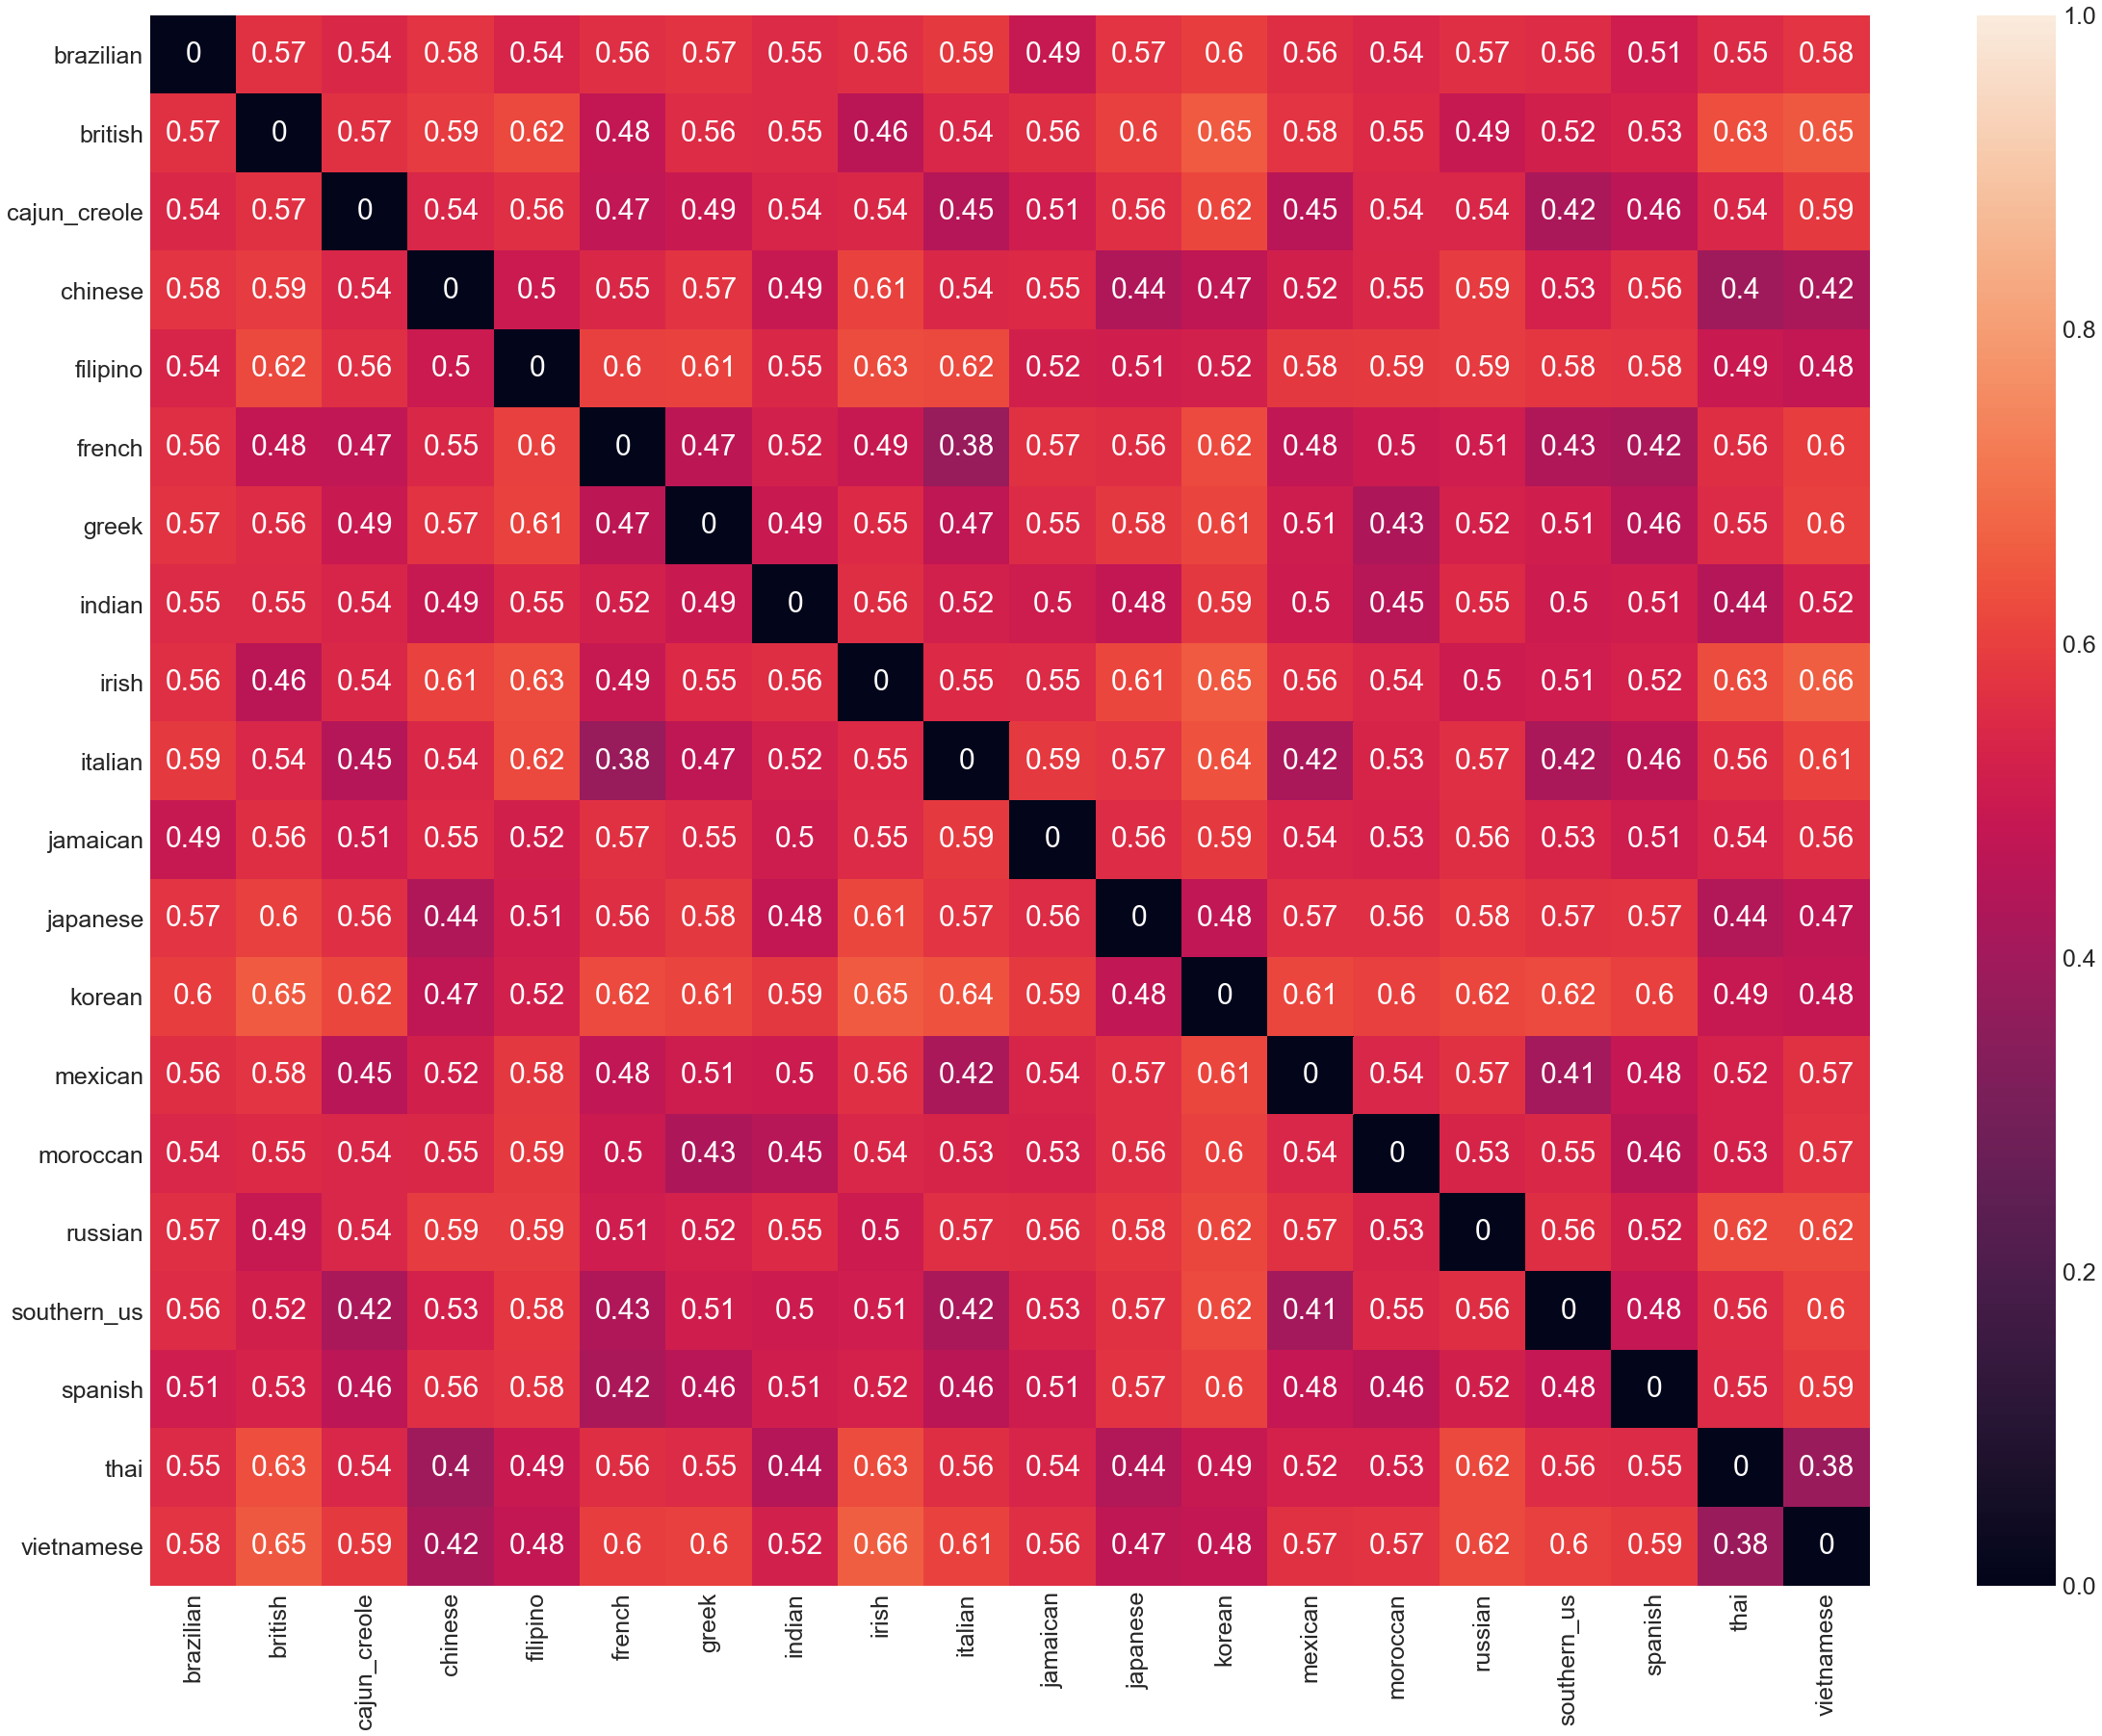

In [52]:
plt.subplots(figsize=(40, 30))
sns.heatmap(dist_cosine, vmax=1, annot=True)
sns.set(font_scale=1.5);

In [32]:
k=0
similar=pd.DataFrame()
for i in range(0,20):
    for j in range(i,20):
        if ((dd.loc[i,j]<.5) & (dd.loc[i,j]!=0)):
            similar[k] = (dict[i], dict[j], round(dd.loc[i,j],2))
            k=k+1

In [33]:
#how close two cuisnes are based on the ingredients used
similar.T.sort_values(by=2,ascending=True)

,0,1,2
44,thai,vietnamese,0.38
20,french,italian,0.38
14,chinese,thai,0.4
40,mexican,southern_us,0.41
33,italian,southern_us,0.42
24,french,spanish,0.42
32,italian,mexican,0.42
15,chinese,vietnamese,0.42
8,cajun_creole,southern_us,0.42
23,french,southern_us,0.43


In [34]:
train['ngrams']=train['seperated_ingredients'].str.replace(',',' ')
train.head()

,cuisine,id,ingredients,seperated_ingredients,bin ingredients,ngrams
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","romaine lettuce,black olives,grape tomatoes,ga...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...",romaine lettuce black olives grape tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","plain flour,ground pepper,salt,tomatoes,ground...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...",plain flour ground pepper salt tomatoes ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","eggs,pepper,salt,mayonaise,cooking oil,green c...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",eggs pepper salt mayonaise cooking oil green c...
3,indian,22213,"[water, vegetable oil, wheat, salt]","water,vegetable oil,wheat,salt","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",water vegetable oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","black pepper,shallots,cornflour,cayenne pepper...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",black pepper shallots cornflour cayenne pepper...


In [35]:
def top_ingredients_cuisine(cuisine):
    frame=train[train['cuisine']==cuisine]
    com=list(nltk.bigrams(nltk.word_tokenize(" ".join(frame['ngrams']))))
    return pd.DataFrame(Counter(com),index=['count']).T.sort_values('count',ascending=False)[:12]

In [36]:
for i in aa:
    print("-------------------------------")
    print("           "+i)
    print("-------------------------------")
    print(top_ingredients_cuisine(i))
    print("\n")

-------------------------------
           brazilian
-------------------------------
                     count
olive     oil          133
garlic    cloves        86
coconut   milk          82
bell      pepper        80
black     pepper        73
condensed milk          68
black     beans         57
sweetened condensed     57
ground    black         50
lime      juice         49
vegetable oil           43
red       pepper        34


-------------------------------
           british
-------------------------------
                    count
all-purpose flour     238
unsalted    butter    191
baking      powder    128
black       pepper    117
large       eggs      112
brown       sugar     102
heavy       cream      92
olive       oil        76
baking      soda       73
ground      black      72
whipping    cream      67
egg         yolks      67


-------------------------------
           cajun_creole
-------------------------------
                       count
bell        pepper    

                   count
fish      sauce      484
soy       sauce      234
lime      juice      218
black     pepper     168
garlic    cloves     167
vegetable oil        145
green     onions     141
rice      vinegar    137
fresh     ginger     135
sesame    oil        116
fresh     lime       116
ground    black      104




In [37]:
x=pd.DataFrame(train['ingredients'])
y=pd.DataFrame(train['cuisine'])

In [38]:
t=pd.DataFrame(test['ingredients'])

In [39]:
x.head()

,ingredients
0,"[romaine lettuce, black olives, grape tomatoes..."
1,"[plain flour, ground pepper, salt, tomatoes, g..."
2,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,"[water, vegetable oil, wheat, salt]"
4,"[black pepper, shallots, cornflour, cayenne pe..."


In [40]:
y.head()

,cuisine
0,greek
1,southern_us
2,filipino
3,indian
4,indian


In [41]:
t.head()

,ingredients
0,"[baking powder, eggs, all-purpose flour, raisi..."
1,"[sugar, egg yolks, corn starch, cream of tarta..."
2,"[sausage links, fennel bulb, fronds, olive oil..."
3,"[meat cuts, file powder, smoked sausage, okra,..."
4,"[ground black pepper, salt, sausage casings, l..."


In [42]:
#vectorizing using tf-idf to remove common ingredients used in all like salt
tfhash =  TfidfVectorizer(stop_words='english',max_df=.95,ngram_range=(1,2))
X_train = tfhash.fit_transform(x.ingredients.str.join(' '))
X_test = tfhash.transform(t.ingredients.str.join(' '))

In [43]:
lb = LabelEncoder()
y1 = lb.fit_transform(y)

C:\Users\Mrinal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y1 , random_state = 0)

In [45]:
# Below are the tests for the optimum classifier and the grid search. uncomment to run code

# clf2 = ExtraTreesClassifier()
# clf2.fit(x_train , y_train)
# clf2.score(x_test, y_test)

# 0.6878519710378117

# clf2 = RandomForestClassifier()
# clf2.fit(x_train , y_train)
# clf2.score(x_test, y_test)

# 0.6766894609814964

# clf2 = LinearSVC()
# clf2.fit(x_train , y_train)
# clf2.score(x_test, y_test)

# 0.8018905872888173

# clf1 = LogisticRegression()
# clf1.fit(x_train , y_train)
# clf1.score(x_test, y_test)
# 0.791331456154465

# param_grid = {'C' : [0.2, 0.5, 2, 5, 10, 20]}
# svc = GridSearchCV(LinearSVC(),param_grid,  cv=5)
# svc.fit(X_train, y1)
# svc.best_params_
# {'C': 0.5}

# param_grid = {'C' : [0.490, .495, .498, .501, .505,  .507, , .510, .515, .520, .55 ]}
# svc = GridSearchCV(LinearSVC(),param_grid,  cv=5)
# svc.fit(X_train, y1)
# svc.best_params_
# {'C': 0.505}

# param_grid = {'C' : [0.505] , 'dual' :[True,False] }
# svc = GridSearchCV(LinearSVC(),param_grid,  cv=5)
# svc.fit(X_train, y1)
# svc.best_params_
#{'C': 0.505, 'dual': True}

# param_grid = {'C' : [ 2]}
# lcv = GridSearchCV(LogisticRegression(),param_grid,  cv=5)
# lcv.fit(X_train, y1)
# lcv.best_params_
# {'C': 2}

# param_grid = {'C' : [0.2, 0.5,2,5,10,20]}
# lcv = GridSearchCV(LogisticRegression(),param_grid,  cv=5)
# lcv.fit(X_train, y1)
# lcv.best_params_
# {'C': 5}

# param_grid = {'C' : [5,5.5, 6,7,8]}
# lcv = GridSearchCV(LogisticRegression(),param_grid,  cv=5)
# lcv.fit(X_train, y1)
# lcv.best_params_
# {'C': 8}

# param_grid = {'C' : [8, 8.5, 9, 9.5]}
# lcv = GridSearchCV(LogisticRegression(),param_grid,  cv=5)
# lcv.fit(X_train, y1)
# lcv.best_params_
# {'C': 8}

# vc = VotingClassifier(estimators=[('logreg',LogisticRegression(C=8)),
#                        ('svc',CalibratedClassifierCV(LinearSVC(C= 0.505, dual=True)))],
#                        voting='soft',n_jobs=-1, weights=[1,2])

# params = {'weights':[[1,2],[2,1]]}
# grid_Search = GridSearchCV(param_grid = params, estimator=vc)
# grid_Search.fit(X_train,y1)
# # print(grid_Search.best_Score_)
# print(grid_Search.best_params_)
# #{'weights': [1, 2]}

In [46]:
lr=LogisticRegression(C=8)
lr.fit(X_train,y1)

y_predicted = lr.predict(X_test)
y_predicted_final = lb.inverse_transform(y_predicted)
predictions = pd.DataFrame({'cuisine' : y_predicted_final , 'id' : test.id })
predictions = predictions[[ 'id' , 'cuisine']]
predictions.to_csv('lr_cook.csv', index = False)

#test accuracy :- 0.79203

C:\Users\Mrinal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [47]:
s=LinearSVC(C= 0.505, dual=True)
s.fit(X_train,y1)

y_predicted = s.predict(X_test)
y_predicted_final = lb.inverse_transform(y_predicted)
predictions = pd.DataFrame({'cuisine' : y_predicted_final , 'id' : test.id })
predictions = predictions[[ 'id' , 'cuisine']]
predictions.to_csv('svc_cook.csv', index = False)

#test accuracy :- 0.79454

C:\Users\Mrinal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [48]:
#voting classifier used with soft voting.

from sklearn.calibration import CalibratedClassifierCV
vc = VotingClassifier(estimators=[('logreg',LogisticRegression(C=8)),
                       ('svc',CalibratedClassifierCV(LinearSVC(C= 0.505, dual=True)))],
                       voting='soft',n_jobs=-1, weights=[1,2])
vc.fit(X_train,y1)

y_predicted = vc.predict(X_test)
y_predicted_final = lb.inverse_transform(y_predicted)
predictions = pd.DataFrame({'cuisine' : y_predicted_final , 'id' : test.id })
predictions = predictions[[ 'id' , 'cuisine']]
predictions.to_csv('vcsoft_cook.csv', index = False)

#test accuracy :- 0.79575

C:\Users\Mrinal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Mrinal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
